In [2]:
# Loading Libraries and Data
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [5]:
with open('postgres_public_data_allegation.csv') as f:
    df = pd.read_csv(f)
f.close()
data  = pd.read_csv('postgres_public_data_allegation.csv')
train = data.head(1200)
test = data.tail(400)

In [10]:
train[train['is_officer_complaint'] == True].head(10)
train[train['is_officer_complaint'] == False].head(10)
train["is_officer_complaint"].value_counts()

False    772
True     375
Name: is_officer_complaint, dtype: int64

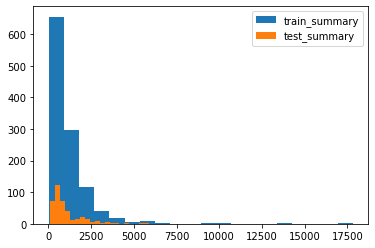

In [11]:
length_train = train['summary'].str.len()
length_test = test['summary'].str.len()

plt.hist(length_train, bins=20, label="train_summary")
plt.hist(length_test, bins=20, label="test_summary")
plt.legend()
plt.show()

In [12]:
combi = train.append(test, ignore_index=True)
combi.shape

(1547, 21)

In [13]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [16]:
# Removing Handles
combi['tidy_summary'] = np.vectorize(remove_pattern)(combi['summary'], "@[\w]*") 
# Removing Punctuations, Numbers, and Special Characters
combi['tidy_summary'] = combi['tidy_summary'].str.replace("[^a-zA-Z#]", " ")
# Removing Short Words
combi['tidy_summary'] = combi['tidy_summary'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# et’s take another look at the first few rows of the combined dataframe.
combi.head()

,crid,summary,add2,city,incident_date,point,source,beat_id,is_officer_complaint,add1,...,first_end_date,first_start_date,most_common_category_id,coaccused_count,subjects,created_at,updated_at,is_extracted_summary,cr_text,tidy_summary
0,1086737,"On September 13, 2017 at approximately 5:40 pm, CPD District A Officers A and were dispatched to the Restaurant 1 at S. Cicero Ave. in response to a 911 call made by the manager of the Restaurant ...",West 63RD ST,CHICAGO ILLINOIS 60629,2017-09-13 00:00:00+00,0101000020E6100000BEF8A23D5EED55C09A249694BBE34440,NaN,276.0,False,34XX,...,2018-04-30,2017-09-14,99.0,1,NaN,2019-01-09 04:41:26.530261+00,2020-01-03 05:03:38.08579+00,True,NaN,September approximately District Officers were dispatched Restaurant Cicero response call made manager Restaurant Civilian security guard Security Guard call made because Subject trespassing prope...
1,1088501,"On February 15, 3018, Police Of?cer?s and allegedly conducted a traffic stop on for no reason. It was further alleged that PO called Mr. - a ?cocksucker,? and threw his ID card at him.",South OGLESBY AVE,CHICAGO ILLINOIS 60617,2018-02-15 00:00:00+00,0101000020E61000000CF2690451E455C0C0C7050C37E04440,NaN,224.0,False,79XX,...,NaN,2018-02-16,81.0,2,NaN,2019-01-09 04:41:26.530261+00,2020-01-03 05:03:38.109931+00,True,NaN,February Police allegedly conducted traffic stop reason further alleged that called cocksucker threw card
2,1089797,"October 9, 2016 11:11 PM June 8, 2018 1:08 PM On October 9, 2016, the complainant, was subject to a traffic stop. He was ultimately arrested for unlawful use of a weapon, among other charges. - al...",West NORTH AVE,CHICAGO ILLINOIS 60647,2016-10-08 00:00:00+00,0101000020E6100000436F96372CED55C04312071A7DF44440,NaN,59.0,False,31XX,...,NaN,NaN,NaN,0,NaN,2019-01-09 04:41:26.530261+00,2020-01-03 05:03:38.122966+00,True,NaN,October June October complainant subject traffic stop ultimately arrested unlawful weapon among other charges alleged arrested Officers Sergeant Officer without justification further alleged that ...
3,1087568,"On or about December 11, 2016, Officer A (?Of?cer Star no. while off?duty, went to the residence of complainant Subject 1 (?Subject located at S. Ingleside, Chicago, Illinois. Officer A was told t...",South INGLESIDE AVE,CHICAGO ILLINOIS 60637,2016-12-11 00:00:00+00,0101000020E61000001650A8A78FE655C02D99637957E34440,NaN,203.0,False,65XX,...,2018-02-16,2017-11-19,329.0,1,NaN,2019-01-09 04:41:26.530261+00,2020-01-03 05:03:38.132381+00,True,NaN,about December Officer Star while duty went residence complainant Subject Subject located Ingleside Chicago Illinois Officer told leave about Officer while duty again went residence Subject Subjec...
4,1074527,"On 04 April 2015, at approximately 0237 hours, Reporting Third Party, Sergeant A, was contacted by Beat and asked to respond to their location at the block of North Lakewood Street. Upon arrival, ...",North LAKEWOOD AVE,CHICAGO ILLINOIS 60660,2015-04-04 00:00:00+00,0101000020E6100000E880C93269EA55C00CFB873E69FF4440,NaN,37.0,True,62XX,...,2017-11-30,2015-04-04,115.0,2,NaN,2019-01-09 04:41:26.530261+00,2020-01-03 05:03:38.140629+00,True,NaN,April approximately hours Reporting Third Party Sergeant contacted Beat asked respond their location block North Lakewood Street Upon arrival Sergeant with Officer related that accidentally discha...


###  Text Normalization
Here we will use nltk's PorterStemmer() function to normalize the summary. But before that we will have to tokenize the tweets. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [18]:
tokenized_tweet = combi['tidy_summary'].apply(lambda x: x.split()) # tokenizing
tokenized_tweet.head()

0    [September, approximately, District, Officers, were, dispatched, Restaurant, Cicero, response, call, made, manager, Restaurant, Civilian, security, guard, Security, Guard, call, made, because, Sub...
1                                                                                   [February, Police, allegedly, conducted, traffic, stop, reason, further, alleged, that, called, cocksucker, threw, card]
2    [October, June, October, complainant, subject, traffic, stop, ultimately, arrested, unlawful, weapon, among, other, charges, alleged, arrested, Officers, Sergeant, Officer, without, justification,...
3    [about, December, Officer, Star, while, duty, went, residence, complainant, Subject, Subject, located, Ingleside, Chicago, Illinois, Officer, told, leave, about, Officer, while, duty, again, went,...
4    [April, approximately, hours, Reporting, Third, Party, Sergeant, contacted, Beat, asked, respond, their, location, block, North, Lakewood, Street, Upon, arrival, Sergeant, wit

Now we can normalize the tokenized summary. 
Now let’s stitch these tokens back together.

In [20]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
    
combi['tidy_summary'] = tokenized_tweet

## Story Generation and Visualization from Summary

####  Understanding the common words used in the summary: WordCloud
Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

Let’s visualize all the words our data using the wordcloud plot.

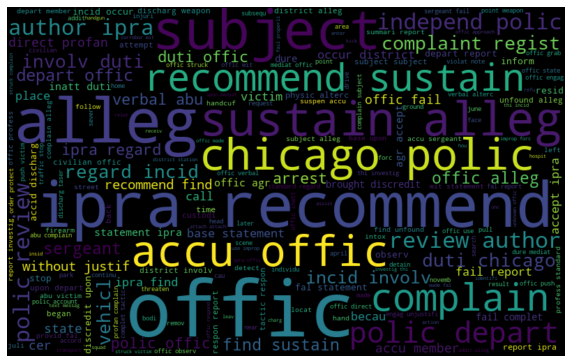

In [21]:
all_words = ' '.join([text for text in combi['tidy_summary']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

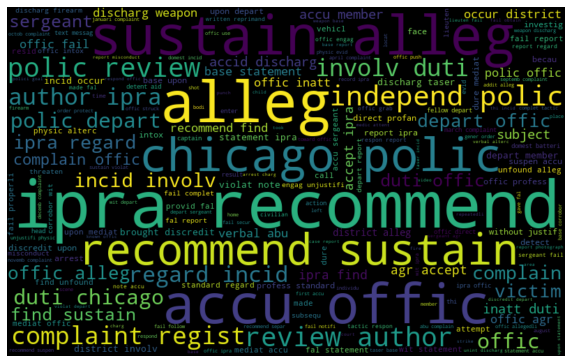

In [22]:
negative_words = ' '.join([text for text in combi['tidy_summary'][combi['is_officer_complaint'] == True]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

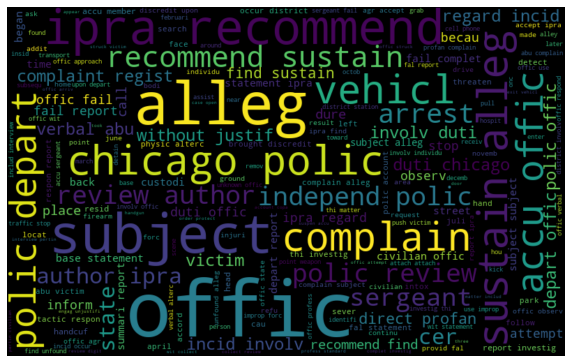

In [62]:
negative_words = ' '.join([text for text in combi['tidy_summary'][combi['is_officer_complaint'] == False]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Extracting Features from Cleaned Summary

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

# Bag-of-Words Features
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_summary'])
bow.shape

(1547, 1000)

In [64]:
# TF-IDF Features
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_summary'])
tfidf.shape

(1547, 1000)

In [66]:
# Word Embeddings
# Word2Vec Embeddings
tokenized_tweet = combi['tidy_summary'].apply(lambda x: x.split()) # tokenizing

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,  # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_summary']), epochs=20)

(2345025, 3157580)

Let's play a bit with our Word2Vec model and see how does it perform. We will specify a word and the model will pull out the most similar words from the corpus.

In [67]:
model_w2v.wv.most_similar(positive="good")

[('apprehend', 0.6719204187393188),
 ('vertebra', 0.6529588103294373),
 ('escap', 0.6364629864692688),
 ('oath', 0.6194215416908264),
 ('retali', 0.606857180595398),
 ('circuit', 0.590214192867279),
 ('plan', 0.5860939621925354),
 ('bicep', 0.5841928124427795),
 ('flat', 0.5841535925865173),
 ('surpri', 0.5789341330528259)]

In [68]:
model_w2v.wv.most_similar(positive="beat")

[('cam', 0.476767897605896),
 ('hoyn', 0.4749719500541687),
 ('mobil', 0.466378778219223),
 ('atrol', 0.46605098247528076),
 ('calumet', 0.44950994849205017),
 ('evalu', 0.44371482729911804),
 ('ioin', 0.43741708993911743),
 ('irlfriend', 0.4372859299182892),
 ('concert', 0.4357612431049347),
 ('unbeknownst', 0.43363240361213684)]

### Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [83]:
# Bag-of-Words Features
train_bow = bow[:1147,:]
test_bow = bow[1147:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['is_officer_complaint'],  
                                                          random_state=42, 
                                                          test_size=0.3)


In [84]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6956521739130435

In [86]:
# Now let's make predictions for the test dataset and create a submission file.
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['is_officer_complaint'] = test_pred_int
submission = test[['beat_id','is_officer_complaint']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

<ipython-input-86-630541efba95>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['is_officer_complaint'] = test_pred_int


In [89]:
# TF-IDF Features
train_tfidf = tfidf[:1147,:]
test_tfidf = tfidf[1147:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

In [90]:
lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.694560669456067